In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

Data Collection and Pre-processing

In [4]:
raw_mail_data = pd.read_csv('Dataset/mail_data.csv')

In [5]:
# replace the null values with a null string
raw_mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:
raw_mail_data.head(6)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [7]:
raw_mail_data.shape

(5572, 2)

Label Encoding

In [8]:
# label spam mail as 0;  ham mail as 1;

raw_mail_data.loc[raw_mail_data['Category'] == 'spam', 'Category',] = 0
raw_mail_data.loc[raw_mail_data['Category'] == 'ham', 'Category',] = 1

In [9]:
raw_mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [10]:
X = raw_mail_data['Message']
Y = raw_mail_data['Category']

In [11]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [12]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


splitting the data into train and test

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [14]:
print(X.shape)
print(X_test.shape)
print(X_train.shape)

(5572,)
(1115,)
(4457,)


Feature Extraction

In [15]:
#transform the text data to feature vector that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

Training the Model

Logistic Regression

In [16]:
model = LogisticRegression()

In [17]:
#training the logistic regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

In [18]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [19]:
print("Accuracy on the training model: ",accuracy_training_data)

Accuracy on the training model:  0.9670181736594121


In [20]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [21]:
print("Accuracy on the test model: ",accuracy_training_data)

Accuracy on the test model:  0.9670181736594121


In [22]:
input_mail = ["How are u"]
#convert text to feature vectors
input_data = feature_extraction.transform(input_mail)

#making prediction  
prediction = model.predict(input_data)
print(prediction)

if prediction[0]==1:
    print("It is an Ham Mail")
else:
    print("Spam Mail")

[1]
It is an Ham Mail


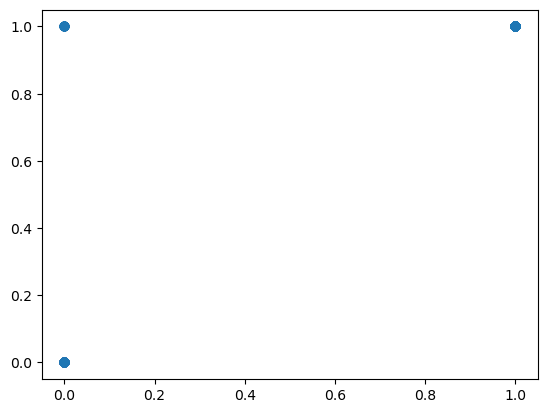

In [137]:
plt.scatter(Y_test,prediction_on_test_data)